In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


churn = pd.read_csv('churn.csv', index_col=0)

In [21]:
churn

,account length,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,128,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,0,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
3329,68,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
3330,28,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0
3331,184,1,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0


In [22]:
churn[churn['international plan'] ==1]['total day charge'].mean()

31.95839009287925

In [23]:
churn[churn['international plan'] == 0]['total day charge'].mean()

30.412495016611384

## Total Day Charge is an important feature in our best model

In [24]:
churn['total day charge'].describe()

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: total day charge, dtype: float64

In [25]:
churn[churn['total day charge'] > 30.5]['churn'].mean()

0.17548076923076922

In [26]:
churn[churn['total day charge'] <= 30.5]['churn'].mean()

0.11443978430197724

In [102]:
daych1 = churn[churn['total day charge'] > 30.5]['churn']
daych2 = churn[churn['total day charge'] <= 30.5]['churn']

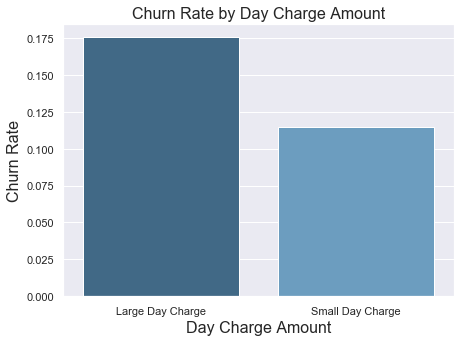

In [103]:
## Bar Plot

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x = ['Large Day Charge', 'Small Day Charge'],y= [daych1.mean(), daych2.mean()], order = ['Large Day Charge', 'Small Day Charge'],palette ='Blues_d', ax=ax)
ax.set_xlabel("Day Charge Amount", fontsize=16)
ax.set_ylabel("Churn Rate", fontsize=16)
ax.set_title('Churn Rate by Day Charge Amount', fontsize=16)
## Saving the figure
fig.savefig("Churn Rate by Day Charge Amount.png")
ax;

## Customers with large day charges are far more likely to churn than customers who do not have large day charges. SyriaTel needs to reanalyze how much it charges for day minutes. It's day rates are so high that frequent  day users end up leaving SyriaTel .  If they end up lowering day minute rates, they could justify this reduction by raising their international rates. This would also reduce churn rate because there would be less customers that sign up for SyriaTel just for their international plan and end up leaving shortly thereafter.

## From our best model, we learned that Customer Service Calls was an important feature but why?

In [53]:
churn['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [28]:
churn[churn['customer service calls'] > 1 ]['churn'].mean()

0.18487972508591066

In [29]:
churn[churn['customer service calls'] <= 1]['churn'].mean()

0.11395101171458999

In [30]:
churn[churn['customer service calls'] > 1]['churn'].count()

1455

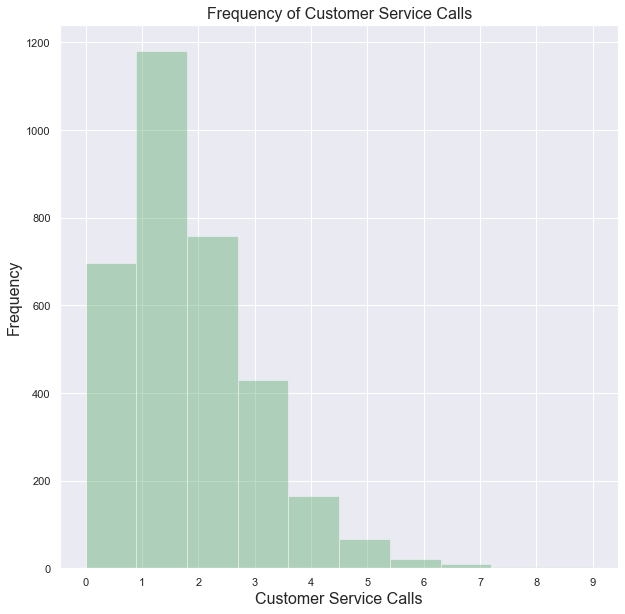

In [105]:
## Histogram

fig, ax = plt.subplots(figsize=(10,10))
sns.set()
sns.distplot(churn['customer service calls'], bins = 10,  kde = False, color = 'g', ax=ax)
ax.set_xlabel("Customer Service Calls", fontsize=16)
ax.set_title('Frequency of Customer Service Calls', fontsize = 16)
ax.set_xticks(churn['customer service calls'].value_counts().index)
ax.set_ylabel("Frequency", fontsize=16)
ax;

In [106]:
## Saving the figure

fig.savefig("Frequency of Customer Service Calls.png")

## As you can see from the above graph, there is a high number of SyriaTel Customers that are making frequent customer service calls. These frequent customer service callers are more likely to churn. There is some kind of service quality or billing issue that causes SyriaTel customers to call customer service so frequently.